In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import random
from mpl_toolkits.mplot3d import Axes3D

In [2]:
class Block:
   
    # Creating a block class to implement the actual blocks
    def __init__(self, x: int, y: int, number: int, color: str, isHeart: bool, penalty: float = None):
        """
        Parameters
        ----------
        x: int -> X-coordinate of the block
        y: int -> Y-coordinate of the block
        number: int -> Position of block
        color: str -> Color of the block
        isHeart: bool -> `True` if the block is heart, `False` if not.
        penalty: float -> Penalty laid on agent when landing on the block.
        """
        self.x = x
        self.y = y
        self.penalty = penalty
        self.number = number
        self.color = color
        self.isHeart = isHeart
    
    # Overriding string literal for easy printing
    def __str__(self):
        return f"POS: {(self.x, self.y)}\nNUM: {self.number}\nCLR: {self.color}\nHRT: {self.isHeart}\nPEN: {self.penalty}\n"
    
    # Overriding equal-to literal for easy comparision
    def __eq__(self, other):
        if isinstance(other, Block):
            return self.number == other.number

        return self.number == other

In [3]:
# Input from the User
map_1 = [['R', 'G', 'G', 'G', 'R', 'G'],
         ['G', 'G', 'G', 'R', 'G', 'G'],
         ['G', 'G', 'R', 'GH', 'G', 'G'],
         ['G', 'R', 'G', 'G', 'G', 'R'],
         ['R', 'G', 'G', 'G', 'R', 'G'],
         ['G', 'G', 'G', 'R', 'G', 'G']]

# map_1 = [['R', 'G', 'R', 'G', 'R', 'G'],
#          ['G', 'R', 'G', 'R', 'G', 'R'],
#          ['R', 'G', 'RH', 'G', 'R', 'G'],
#          ['G', 'R', 'G', 'R', 'G', 'R'],
#          ['R', 'G', 'R', 'G', 'R', 'G'],
#          ['G', 'R', 'G', 'R', 'G', 'R']]


In [4]:
# Calculating side length
side = len(map_1)

# Flattening the array
flat_map = np.array(map_1).reshape(side*side)

# Searching for Red or Green heart and its position
rh = np.where(flat_map == 'RH')[0]
gh = np.where(flat_map == 'GH')[0]

# Getting position of heart
heart_number = (rh if rh.size>0 else gh)[0]

# Converting position to coordinates
heart_coordinates = (heart_number//side) ,(heart_number%side)

# Retrieving color of heart
heart_color = 'R' if rh.size>0 else 'G'

print(f"Map Size: ({side} x {side})\nHeart Position: {heart_number}\nHeart Coordinates: {heart_coordinates}\nHeart Color: {heart_color}")

Map Size: (6 x 6)
Heart Position: 15
Heart Coordinates: (2, 3)
Heart Color: G


In [5]:
# Generating a random position to start
start_number = random.randint(0,len(flat_map)-1)
start_number

18

In [6]:
def build_map(map_1, agent):
    # Creating a output map which stores converted version of `map_1`
    side = len(map_1)
    output_map = [[] for i in range(side)]
    
    # Loop over sides
    for i in range(side):

        # Loop over blocks on each side
        for j in range(side):

            # Check for 'Red' block
            if map_1[i][j] == 'R':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=0, 
                                           isHeart=False, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='R' else 5) + (-10 if agent==0 else 10) + 1)
                                          ))
            # Check for 'Green' block
            if map_1[i][j] == 'G':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=1, 
                                           isHeart=False, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='G' else 5) + (-10 if agent==1 else 10) + 1)
                                          ))
            # Check for 'Green Heart' block
            if map_1[i][j] == 'GH':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=1, 
                                           isHeart=True, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='G' else 5) + (-10 if agent==1 else 10) + 1)
                                          ))
            # Check for 'Red Heart' block
            if map_1[i][j] == 'RH':
                # Adding coordinates, position, color, if its a Heart, and penalty based on requirements
                output_map[i].append(Block(x=i, 
                                           y=j, 
                                           number=((j)+(side*i)), 
                                           color=0, 
                                           isHeart=True, 
                                           penalty= ((abs(heart_coordinates[0]-i)+abs(heart_coordinates[1]-j)) + (-5 if heart_color=='R' else 5) + (-10 if agent==0 else 10) + 1)
                                          ))
    return output_map

output_map_R1 = build_map(map_1, agent=0)
output_map_G1 = build_map(map_1, agent=1)

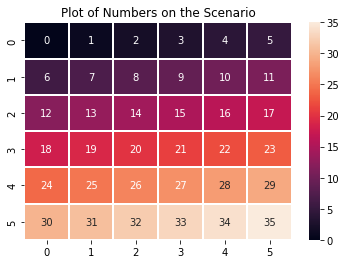

In [7]:
# Heatmap to show the scenario map with positions
nodes = pd.DataFrame([[i.number for i in output_map_R1[j]] for j in range(len(output_map_R1))])
plt.title('Plot of Numbers on the Scenario')
sns.heatmap(nodes, linewidths=0.1, annot=True)
plt.show()

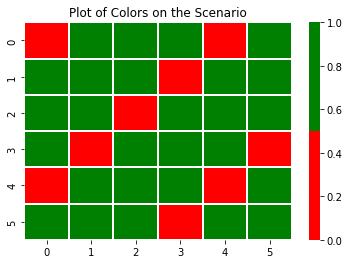

In [8]:
# Heatmap to show the scenario map with colors
colors = pd.DataFrame([[i.color for i in output_map_R1[j]] for j in range(len(output_map_R1))])
plt.title('Plot of Colors on the Scenario')
sns.heatmap(colors, cmap=ListedColormap(['red', 'green']), linewidths=0.1)
plt.show()

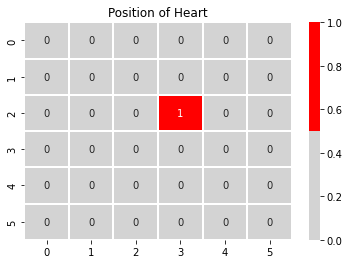

In [9]:
# Heatmap to show the scenario map with position of heart
heart = pd.DataFrame([[i.isHeart for i in output_map_R1[j]] for j in range(len(output_map_R1))])
plt.title('Position of Heart')
sns.heatmap(heart, cmap=ListedColormap(['lightgrey', 'red']), linewidths=0.1, annot=True)
plt.show()

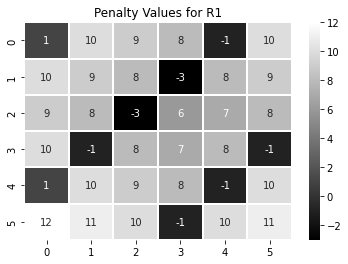

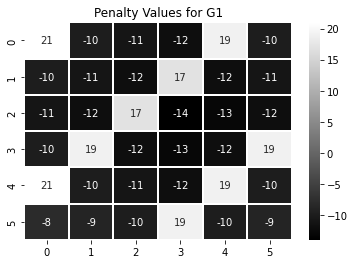

In [10]:
# Heatmap to show the scenario map with penalty values
penalties_R1 = pd.DataFrame([[i.penalty for i in output_map_R1[j]] for j in range(len(output_map_R1))])
plt.title('Penalty Values for R1')
sns.heatmap(penalties_R1, cmap="gray", linewidths=0.1, annot=True)
plt.show()

# Heatmap to show the scenario map with penalty values
penalties_G1 = pd.DataFrame([[i.penalty for i in output_map_G1[j]] for j in range(len(output_map_G1))])
plt.title('Penalty Values for G1')
sns.heatmap(penalties_G1, cmap="gray", linewidths=0.1, annot=True)
plt.show()

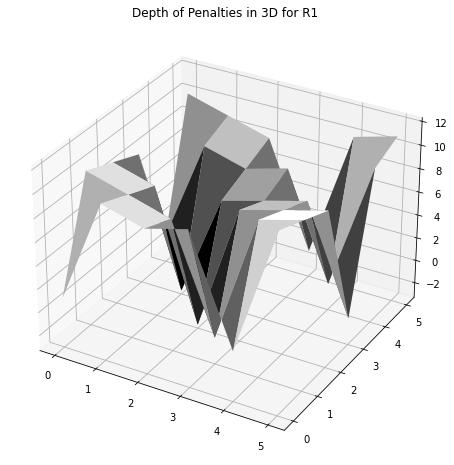

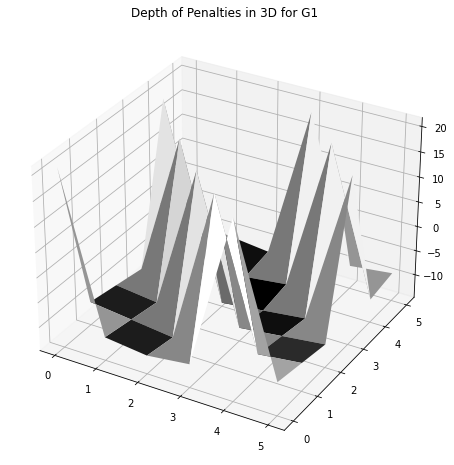

In [11]:
# Heatmap just as above, but in 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(side), range(side))
ax.plot_surface(Y, X, penalties_R1, cmap="gray")
plt.title("Depth of Penalties in 3D for R1")
plt.show()

# Heatmap just as above, but in 3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(range(side), range(side))
ax.plot_surface(Y, X, penalties_G1, cmap="gray")
plt.title("Depth of Penalties in 3D for G1")
plt.show()

In [12]:
# Function to generate edge values based on its side value and position
def find_edges(number: int):
    """
    Returns a list of edges for a given number by incorporating it in the provided map. 
    Requires a global variable `side` which is the length of the side of the map.
    
    Parameters
    ----------
    number: int -> Position number for which the edges are calculated.
    """
    
    # We get edge values respectively
    # We get TOP-EDGE from number-side
    # We get BOTTOM-EDGE from number+side
    # We get LEFT-EDGE from number-1
    # We get RIGHT-EDGE from number+1
    edges = [number-side, number+side, number-1, number+1]
    
    # Not all positions have all 4 edges, we filter the out-of-bounds positions
    edges = [i for i in edges if i>=0 and i<=(side*side)-1 and (abs(number-side+1)%side!=0 or i!=number+1) and ((number)%side!=0 or i!=number-1)]
    return edges

In [13]:
# Holds from-to-penalty trios

###########################################################
########## Make separate variables for R1 and G1 ##########
###########################################################
connections_R1 = []
connections_G1 = []

# Flattening the map to get info
map_flattened_R1 = np.array(output_map_R1).reshape(side*side)
map_flattened_G1 = np.array(output_map_G1).reshape(side*side)

# Create a dictionary with position and penalty as key and values
num_pen_R1 = {i.number: i.penalty for i in map_flattened_R1}
num_pen_G1 = {i.number: i.penalty for i in map_flattened_G1}

# Get from-to-penalty trios and store it in connections
for i in range(side*side):
    connections_R1.extend([(i, j, num_pen_R1[j]) for j in sorted(find_edges(i))])
    connections_G1.extend([(i, j, num_pen_G1[j]) for j in sorted(find_edges(i))])    

In [14]:
# Create a graph with `from` as key and `(to, cost)` as values
graph_R1 = {i:[] for i in range(side*side)}
graph_G1 = {i:[] for i in range(side*side)}

# Function to map values to graph
def addedge(_from, _to, cost, graph):
    """
    Adds edge to the global variable graph, using the position of node, destination node, cost of traversing
    
    Parameters
    ----------
    _from: int -> Source node position
    _to: int -> Destination node position
    cost: int -> Cost of traversing from source to destination
    """
    graph[_from].append((_to, cost))

# Adding edges to all the connections 
for i in connections_R1:
    addedge(i[0], i[1], i[2], graph_R1)
    
for i in connections_G1:
    addedge(i[0], i[1], i[2], graph_G1)

In [15]:
# Greedy Best First Search
from queue import PriorityQueue

def best_first_search(source, destination, blocks, graph):
    """
    Implements Greedy Best First Search algorithm on provided map_grid using source, destination and number of blocks as parameters. 
    Requires a global variable `graph` which is a weighted-undirected graph representing the map_grid.
    
    Parameters
    ----------
    source: int -> starting point of the agent
    destination: int -> position of heart on the map
    blocks: int -> number of blocks present in the map
    """
    visited = [False] * blocks
    path = {}
    my_queue = PriorityQueue()
    my_queue.put((0, source))
    visited[source] = True
    while my_queue.empty() == False:
        _get = my_queue.get()
        _from = _get[1]
        # Displaying the path having lowest cost
        print(_from, end=" ")
        
        if _from == destination:
            break

        for _to, cost in graph[_from]:
            if visited[_to] == False:
                visited[_to] = True
                path[_to] = _from
                my_queue.put((cost, _to))
                
    return path


laid_path_R1 = best_first_search(start_number, heart_number, side*side, graph_R1)
print()
laid_path_G1 = best_first_search(start_number, heart_number, side*side, graph_G1)

18 19 24 13 14 15 
18 12 13 7 8 2 3 1 6 9 15 

In [16]:
final_path_R1 = []
final_path_G1 = []

def get_final_path(node: int, final_path, laid_path):
    """
    A recursive implementation of back propagation which goes from destination to source, to find the most efficient path without the other blocks.
    Requires a global variable `laid_path` which is a dictionary of {`destination`: `source`} pairs.
    
    Parameters
    ----------
    node: int -> node for which the source is required to be found.
    """
    final_path.append(node)
    if node == start_number:
        return
    parent = laid_path[node]
    get_final_path(parent, final_path, laid_path)

get_final_path(heart_number, final_path_R1, laid_path_R1)
get_final_path(heart_number, final_path_G1, laid_path_G1)

final_path_R1, final_path_G1

([15, 14, 13, 19, 18], [15, 9, 8, 7, 13, 12, 18])

In [17]:
def find_final_penalty(final_path: list, num_pen, agent):
    """
    Calculates the total penalty of an `agent` travelling from `source` to `destination`. 
    Based on the final_path we get from `get_final_path` function.
    
    Parameters
    ----------
    final_path: list -> Stores the positions the agent has travelled to reach the destination.
    """
    path_map = np.array([[num_pen[((j)+(side*i))] if ((j)+(side*i)) in final_path else -100 for j in range(side)] for i in range(side)])
    plt.title(f"Path of Agent {'R1' if agent==0 else 'G1'} on this scenario")
    sns.heatmap(path_map, cmap=ListedColormap(['grey', '#34c25a']), linewidths=0.1, annot=np.array(nodes))
    plt.show()
    final_penalty = path_map.sum() - (side*side*-100) - (100*len(final_path))
    print(f"""The final path is shown above.
    Start: {start_number}
    Destination: {heart_number}
    The total penalty for this path is {final_penalty}
    """)
    return final_penalty

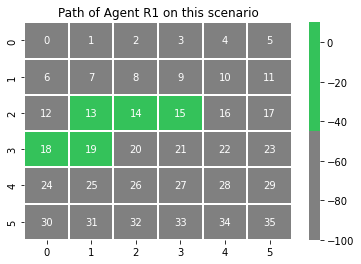

The final path is shown above.
    Start: 18
    Destination: 15
    The total penalty for this path is 20
    


20

In [18]:
find_final_penalty(final_path_R1, num_pen_R1, agent=0)

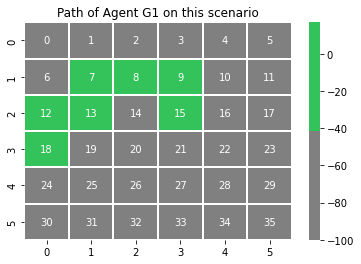

The final path is shown above.
    Start: 18
    Destination: 15
    The total penalty for this path is -53
    


-53

In [19]:
find_final_penalty(final_path_G1, num_pen_G1, agent=1)